# AI-Augmented Audit: Exploratory Data Analysis (EDA)

This notebook marks the beginning of our exploratory data analysis on the credit card fraud detection dataset. The primary goal of this phase is to understand the data structure, the distribution of its variables, and to identify the key characteristics of the business problem

# Data Loading and Initial Setup

First, we import the necessary libraries and load the dataset into pandas DataFrame

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data/creditcard.csv')

## Target Variable Analisys ('Class')

The most critical variable in our project is 'Class', which indicates whether a transaction is normal (0) or fraudulent (1). We will investigate its distribution to understand the nature of the problem.

In [2]:
# Check the distribution of the target variable
print("Class Distribution")
print(df['Class'].value_counts())
print("\n")

# Calculate the percetage of fraudulent transactions
fraud_percentage = (df['Class'].sum() / len(df)) * 100
print(f"Percentage of fraudulent transactions: {fraud_percentage:.4f}%")

Class Distribution
Class
0    284315
1       492
Name: count, dtype: int64


Percentage of fraudulent transactions: 0.1727%


### Conclusion: Extreme Class Imbalance

The analisys reveals an extremely imbalanced dataset, with only **0.1727%** of transactions being fraudulent. This introduces the **Acuracy Paradox**: a model that always predicts "normal" would achieve 99.8% accuracy but would be useless in practice, as it would fail to detect any fraud. Let's quantify the financial impact of these fraudulent transactions.

In [13]:
# Calculate the total financial amount of fraudulent transactions
total_fraud_amount = df.loc[df['Class'] == 1, 'Amount'].sum()
print(f"Total amount lost to fraud in this dataset: {total_fraud_amount:,.2f}")

Total amount lost to fraud in this dataset: 60,127.97


## Analisys of the 'Amount' Feature

Next, we'll investigate the distribution of transactions amounts to understand the typical financial behavior of users.

In [15]:
# Statistical summary of the 'Amount' column
print("Statistical Summary of Amount:")
print(df['Amount'].describe())


Statistical Summary of Amount:
count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64


In [4]:
# Sum the 'Value' column where 'Category' is 'A'
df.loc[df['Class'] == 1, 'Amount'].sum()

np.float64(60127.97)

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64


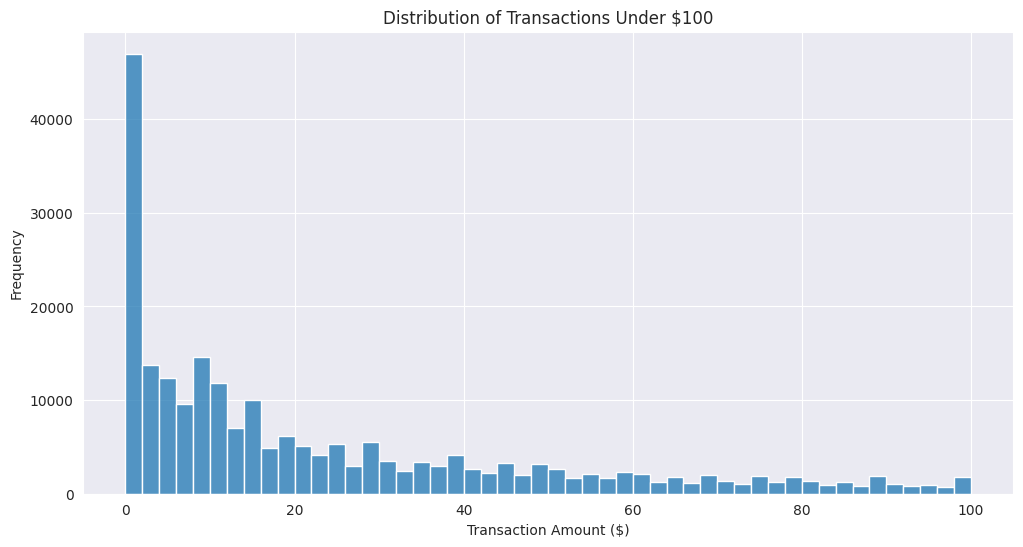

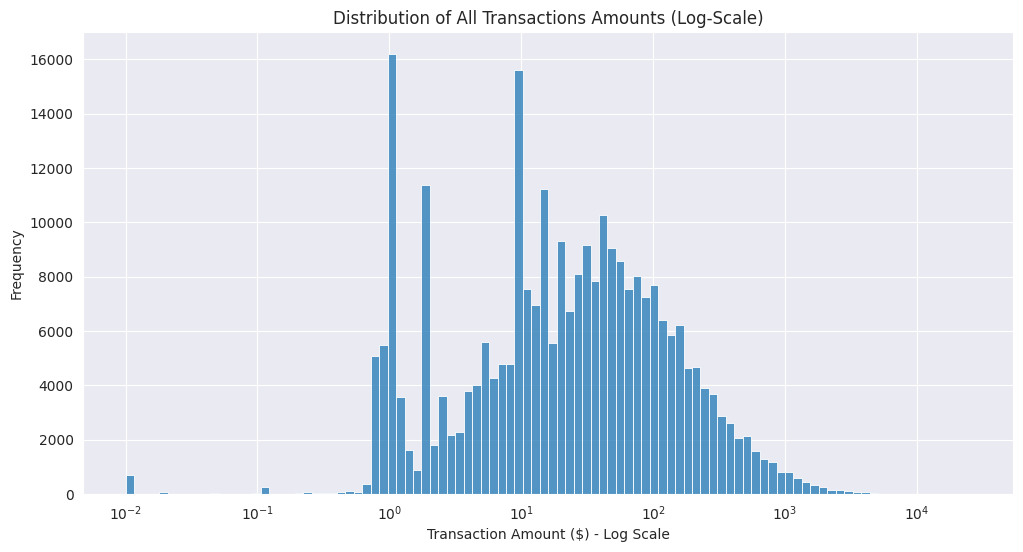

In [30]:
# Descriptive statistics for numerical columns
print(df['Amount'].describe())

# Distribution of transactions under $100
sns.set_style('darkgrid')
plt.figure(figsize=(12, 6))
# Filtered df
filtered_df = df[df['Amount'] < 100]['Amount']
sns.histplot(data=filtered_df, bins=50)
plt.title("Distribution of Transactions Under $100")
plt.xlabel("Transaction Amount ($)")
plt.ylabel('Frequency')
plt.show()

# Distribution of all transactions (log scale)
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Amount', bins=100, log_scale=True)
plt.title("Distribution of All Transactions Amounts (Log-Scale)")
plt.xlabel("Transaction Amount ($) - Log Scale")
plt.ylabel('Frequency')
plt.show()

### Conclusion: `Amount` Distribution

The statistical summary (`mean > median`) and the histograms confirm that the vast majority of transactions are very low value, typically under $20. There are significant outliers with extremely high values, causing strong right-skew in the distribution. The logarithmic scale is essential to visualize the massive concentration of low-value transactions.